In [ ]:
# import os
# os.system('pip install -q glob2==0.7 requests pytest-shutil==1.7.0  pyBigWig==0.3.18 urllib3==1.26.14 tqdm==4.64.1 joblib==1.2.0 ipywidgets==8.0.4 biopython')
# os.system('pip install pydca --no-deps')
# os.system('pip install -i https://test.pypi.org/pypi/ --extra-index-url https://pypi.org/simple PyMEGABASE==1.0.12 --no-deps')


In [2]:
import requests 
requests.__version__

'2.31.0'

In [3]:
import PyMEGABASE as PYMB
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec

In [5]:
from visualize_tmatrix import plot_tmatrix_with_types, plot_tmatrix, plot_tmatrix_summary

In [7]:
#Initialize PyMEGABASE 
pymb=PYMB.PyMEGABASE(cell_line='GM12878', assembly='hg19', organism='human',
                    signal_type='signal p-value',ref_cell_line_path='./GM12878_hg19_test',
                    cell_line_path='./GM12878_hg19_test',
                    histones=True,tf=False,small_rna=False,total_rna=False,n_states=10,res=50) 

    ****************************************************************************************    
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
    ****************************************************************************************    

              The PyMEGABASE class performs the prediction of genomic annotations               
              based on 1D data tracks of Chip-Seq and RNA-Seq. The input data is                
                                obtained from ENCODE data base.                                 
                          PyMEGABASE description is described in: TBD                           

        This package is the product of contributions from a number of people, including:        
                  Esteban Do

In [8]:
all_matrix=pymb.get_tmatrix(range(1,23))

To train the following experiments are used:
ARID3A
ARNT
ASH2L
ATF2
ATF7
BACH1
BATF
BCL11A
BCL3
BCLAF1
BHLHE40
BMI1
BRCA1
CBFB
CBX3
CBX5
CEBPB
CEBPZ
CHD1
CHD2
CHD4
CREM
CTCF
CUX1
DPF2
E2F4
E2F8
E4F1
EBF1
EED
EGR1
ELF1
ELK1
EP300
ESRRA
ETS1
ETV6
EZH2
FOXK2
GABPA
GATAD2B
H2AFZ
H3K27ac
H3K27me3
H3K36me3
H3K4me1
H3K4me2
H3K4me3
H3K79me2
H3K9ac
H3K9me3
H4K20me1
HCFC1
HDAC2
HDAC6
HDGF
HSF1
IKZF1
IKZF2
IRF3
IRF4
IRF5
JUNB
JUND
KDM1A
KDM5A
KLF5
LARP7
MAFK
MAX
MAZ
MEF2A
MEF2B
MEF2C
MLLT1
MTA2
MTA3
MXI1
MYB
NBN
NFATC1
NFATC3
NFE2
NFIC
NFXL1
NFYA
NFYB
NKRF
NR2C1
NR2C2
NR2F1
NRF1
PAX5
PAX8
PBX3
PKNOX1
POLR2A
POLR2AphosphoS2
POLR2AphosphoS5
RAD21
RAD51
RB1
RBBP5
RCOR1
RELB
REST
RFX5
RUNX3
RXRA
SIN3A
SIX5
SKIL
SMAD1
SMAD5
SMARCA5
SMC3
SPI1
SRF
STAT1
STAT3
STAT5A
SUZ12
TAF1
TARDBP
TBL1XR1
TBP
TBX21
TCF12
TCF7
TRIM22
UBTF
USF1
USF2
WRNIP1
YBX1
YY1
ZBED1
ZBTB33
ZBTB40
ZEB1
ZFP36
ZNF143
ZNF207
ZNF217
ZNF24
ZNF384
ZNF592
ZNF622
ZNF687
ZSCAN29
ZZZ3
minus-small-RNA-seq
minus-total-RNA-seq
plus-small-RNA-se

In [9]:
tmatrix=all_matrix[:,0::2]
vmatrix=all_matrix[:,0::2]
testmatrix=all_matrix[:,1::2]
tmatrix.shape,vmatrix.shape,testmatrix.shape,all_matrix.shape

((776, 26226), (776, 26226), (776, 26226), (776, 52452))

In [10]:
tmatrix=pymb.get_tmatrix(range(1,23,2))
vmatrix=pymb.get_tmatrix(range(2,23,4))
testmatrix=pymb.get_tmatrix(range(2,23,2))

To train the following experiments are used:
ARID3A
ARNT
ASH2L
ATF2
ATF7
BACH1
BATF
BCL11A
BCL3
BCLAF1
BHLHE40
BMI1
BRCA1
CBFB
CBX3
CBX5
CEBPB
CEBPZ
CHD1
CHD2
CHD4
CREM
CTCF
CUX1
DPF2
E2F4
E2F8
E4F1
EBF1
EED
EGR1
ELF1
ELK1
EP300
ESRRA
ETS1
ETV6
EZH2
FOXK2
GABPA
GATAD2B
H2AFZ
H3K27ac
H3K27me3
H3K36me3
H3K4me1
H3K4me2
H3K4me3
H3K79me2
H3K9ac
H3K9me3
H4K20me1
HCFC1
HDAC2
HDAC6
HDGF
HSF1
IKZF1
IKZF2
IRF3
IRF4
IRF5
JUNB
JUND
KDM1A
KDM5A
KLF5
LARP7
MAFK
MAX
MAZ
MEF2A
MEF2B
MEF2C
MLLT1
MTA2
MTA3
MXI1
MYB
NBN
NFATC1
NFATC3
NFE2
NFIC
NFXL1
NFYA
NFYB
NKRF
NR2C1
NR2C2
NR2F1
NRF1
PAX5
PAX8
PBX3
PKNOX1
POLR2A
POLR2AphosphoS2
POLR2AphosphoS5
RAD21
RAD51
RB1
RBBP5
RCOR1
RELB
REST
RFX5
RUNX3
RXRA
SIN3A
SIX5
SKIL
SMAD1
SMAD5
SMARCA5
SMC3
SPI1
SRF
STAT1
STAT3
STAT5A
SUZ12
TAF1
TARDBP
TBL1XR1
TBP
TBX21
TCF12
TCF7
TRIM22
UBTF
USF1
USF2
WRNIP1
YBX1
YY1
ZBED1
ZBTB33
ZBTB40
ZEB1
ZFP36
ZNF143
ZNF207
ZNF217
ZNF24
ZNF384
ZNF592
ZNF622
ZNF687
ZSCAN29
ZZZ3
minus-small-RNA-seq
minus-total-RNA-seq
plus-small-RNA-se

In [11]:
#Preprocess the downloaded data for tranining
training_averages=tmatrix.T
n_exp=int(training_averages[:,1:].shape[1]/5)
train_X=training_averages[:,1:]
train_Y=training_averages[:,0]
validation_set=vmatrix.T
val_X=validation_set[:,1:]
val_Y=validation_set[:,0]
test_set=testmatrix.T
test_X=test_set[:,1:]
test_Y=test_set[:,0]

In [12]:
n_exp*5

775

# Dimensionality reduction

## UMAP (Uniform Manifold Approximation and Projection)


In [11]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

zsh:1: no matches found: umap-learn[plot]
  Obtaining dependency information for markdown-it-py from https://files.pythonhosted.org/packages/bf/25/2d88e8feee8e055d015343f9b86e370a1ccbec546f2865c98397aaef24af/markdown_it_py-2.2.0-py3-none-any.whl.metadata
Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Attempting uninstall: markdown-it-py
    Found existing installation: markdown-it-py 3.0.0
    Uninstalling markdown-it-py-3.0.0:
      Successfully uninstalled markdown-it-py-3.0.0
  Obtaining dependency information for ipykernel from https://files.pythonhosted.org/packages/fc/c7/b445faca8deb954fe536abebff4ece5b097b923de482b26e78448c89d1dd/ipykernel-6.30.1-py3-none-any.whl.metadata
  Obtaining dependency information for jupyter-client>=8.0.0 from https://files.pythonhosted.org/packages/11/85/b0394e0b6fcccd2c1eeefc230978a6f8cb0c5df1e4cd3e7625735a0d7d1e/jupyter_client-8.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for pyzmq>=25 from https://files.pythonhost

In [10]:
import umap.umap_ as umap
reducer = umap.UMAP(n_neighbors=10, random_state=10)
embedding = reducer.fit_transform(train_X)
embedding.shape

/home/pcarconoroot1/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(26142, 2)

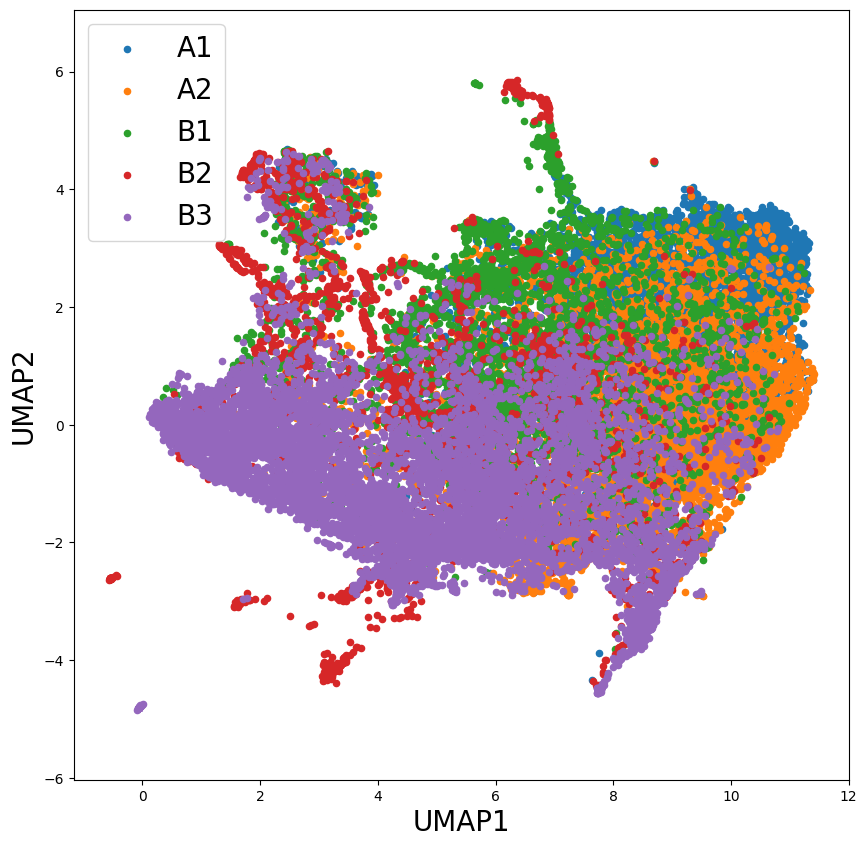

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(5):
    idx=train_Y==i+1
    plt.scatter(embedding[idx, 0], embedding[idx, 1],s=20)
plt.xlabel('UMAP1',fontsize=20)
plt.ylabel('UMAP2',fontsize=20)
plt.legend(['A1','A2','B1','B2','B3'],fontsize=20)
plt.gca().set_aspect('equal', 'datalim')

In [12]:
from sklearn.neighbors import KNeighborsClassifier

reducer = umap.UMAP(n_neighbors=10,random_state=10)
embedding = reducer.fit_transform(train_X)
test_embedding = reducer.transform(test_X)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(embedding, train_Y)
  
# Predict on dataset which model has not seen before
print(knn.predict(test_embedding))
print(train_Y)

/home/pcarconoroot1/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[5. 3. 3. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


In [13]:
accs=[]
for kk in range(5,500,10):
    knn = KNeighborsClassifier(n_neighbors=kk)
    knn.fit(embedding, training_averages[:,0])
    accs.append(np.sum(knn.predict(test_embedding)==test_set[:,0])/len(test_set))


Text(0, 0.5, 'Accuracy')

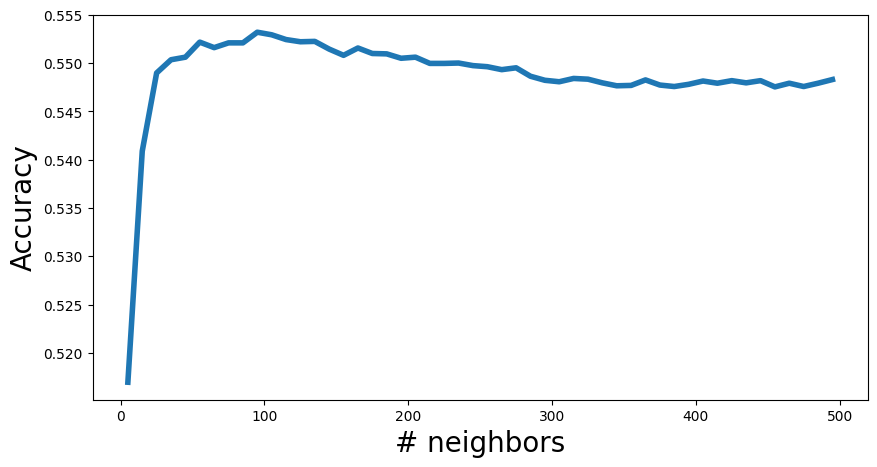

In [14]:
plt.figure(figsize=(10,5))
plt.plot(list(range(5,500,10)),accs,linewidth=4)
plt.xlabel('# neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
#plt.axhline(0.66)

## Decision Trees with Complexity Pruning


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(train_X, train_Y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

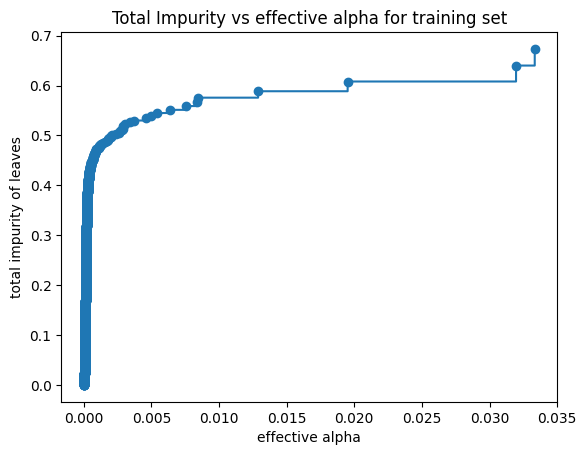

In [18]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [19]:
clfs = []
ccps=ccp_alphas[::100]
print(ccps.shape)
for ccp_alpha in ccps:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_X, train_Y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

(31,)
Number of nodes in the last tree is: 65 with ccp_alpha: 0.09552342641290945


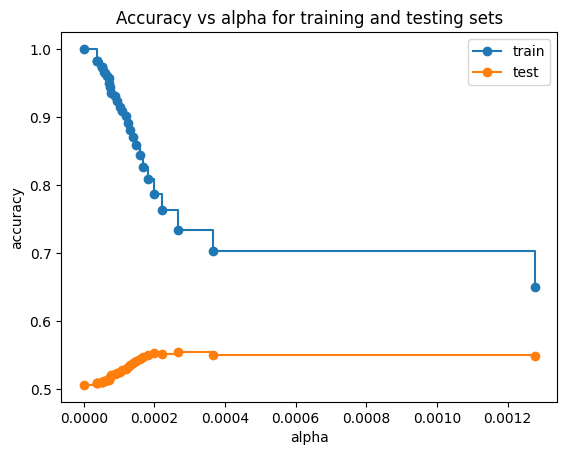

In [20]:
train_scores = [clf.score(train_X, train_Y) for clf in clfs]
test_scores = [clf.score(test_X, test_Y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccps, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccps, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Random Forest Classifier



In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
clfs = []
depths=[2,4,8,16,32,64,128]
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(train_X, train_Y)
    clfs.append(clf)

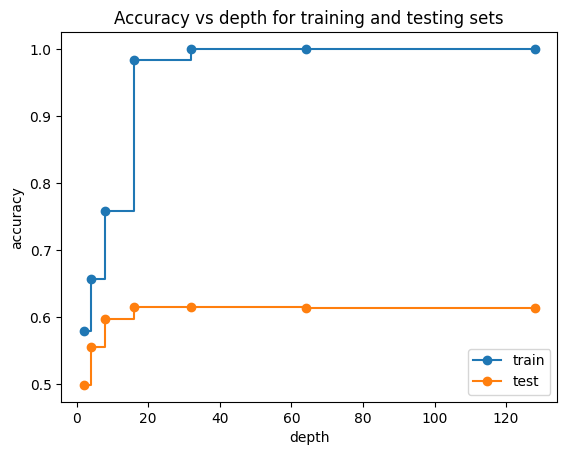

In [23]:
train_scores = [clf.score(train_X, train_Y) for clf in clfs]
test_scores = [clf.score(test_X, test_Y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs depth for training and testing sets")
ax.plot(depths, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(depths, test_scores, marker="o", label="test", drawstyle="steps-post")
#ax.axhline(0.66, color='k')
ax.legend()
plt.show()

# Dense layers

In [35]:
import tensorflow as tf
from tensorflow import keras
import datetime

2025-08-19 13:24:20.338603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 775)               0         
                                                                 
 dense (Dense)               (None, 10)                7760      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 7,925
Trainable params: 7,925
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2025-08-19 13:24:34.463377: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


817/817 [==============================] - 5s 6ms/step - loss: 0.9258 - accuracy: 0.6451
Epoch 2/10
817/817 [==============================] - 4s 5ms/step - loss: 0.7599 - accuracy: 0.7069
Epoch 3/10
817/817 [==============================] - 7s 9ms/step - loss: 0.7002 - accuracy: 0.7279
Epoch 4/10
817/817 [==============================] - 5s 7ms/step - loss: 0.6598 - accuracy: 0.7408
Epoch 5/10
817/817 [==============================] - 3s 4ms/step - loss: 0.6421 - accuracy: 0.7501
Epoch 6/10
817/817 [==============================] - 2s 2ms/step - loss: 0.6293 - accuracy: 0.7517
Epoch 7/10
817/817 [==============================] - 4s 5ms/step - loss: 0.6158 - accuracy: 0.7546
Epoch 8/10
817/817 [==============================] - 4s 5ms/step - loss: 0.5955 - accuracy: 0.7671
Epoch 9/10
817/817 [==============================] - 4s 5ms/step - loss: 0.5892 - accuracy: 0.7693
Epoch 10/10
412/412 [==============================] - 2s 5ms/step - loss: 0.8767 - accuracy: 0.6818
Model: "se

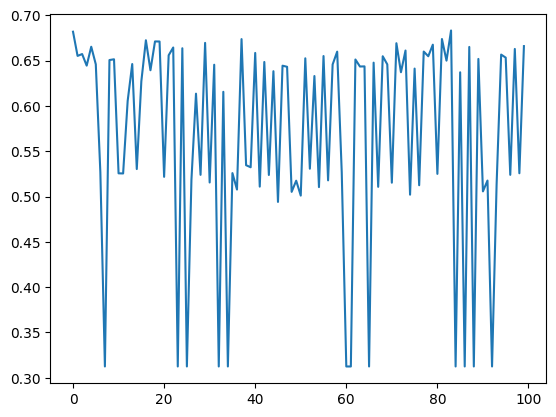

In [36]:

b = np.zeros((train_Y.size, 5))
b[np.arange(train_Y.size), train_Y.astype(int)-1] = 1
c = np.zeros((test_Y.size, 5))
c[np.arange(test_Y.size), test_Y.astype(int)-1] = 1
accs=[]
for _ in range(100):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(775)),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.build()
    model.summary()

    epochs=10
    model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    history = model.fit(train_X, b, epochs=epochs,shuffle=True)
    loss, acc = model.evaluate(test_X[1::2],c[1::2])
    accs.append(acc)
plt.plot(accs)

# Penalized Logistic Regression



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardize features for penalized regression
# This is important because penalties are sensitive to feature scales
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)
val_X_scaled = scaler.transform(val_X) if 'val_X' in locals() else None

## Testing different C values (regularization strength)

C=0.001: Train accuracy=0.789, Test accuracy=0.669
C=0.01: Train accuracy=0.822, Test accuracy=0.674
C=0.1: Train accuracy=0.831, Test accuracy=0.670
C=1: Train accuracy=0.832, Test accuracy=0.668
C=10: Train accuracy=0.831, Test accuracy=0.667
C=100: Train accuracy=0.831, Test accuracy=0.667
C=1000: Train accuracy=0.831, Test accuracy=0.667


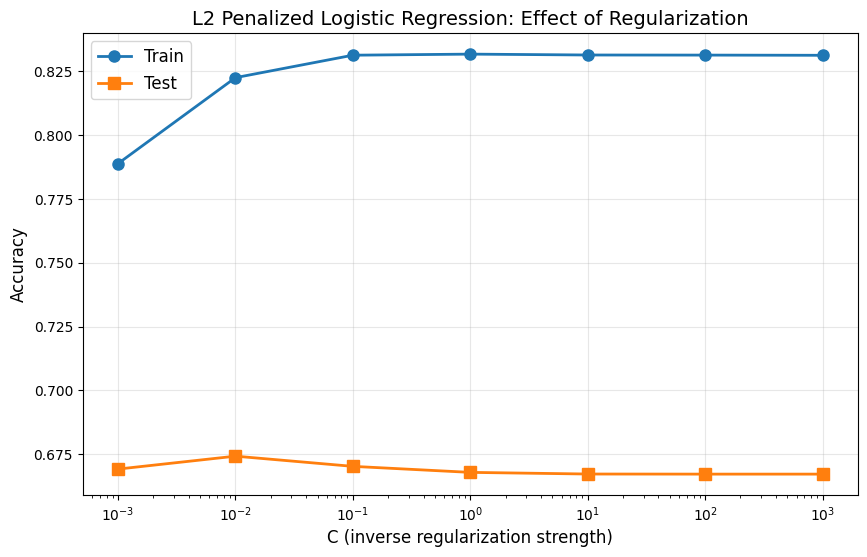

In [15]:
# Test different regularization strengths
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for C in C_values:
    # L2 penalty (Ridge)
    lr_l2 = LogisticRegression(penalty='l2', C=C, solver='lbfgs', 
                               max_iter=1000, multi_class='multinomial', 
                               random_state=42)
    lr_l2.fit(train_X_scaled, train_Y)
    
    train_scores.append(lr_l2.score(train_X_scaled, train_Y))
    test_scores.append(lr_l2.score(test_X_scaled, test_Y))
    print(f'C={C}: Train accuracy={train_scores[-1]:.3f}, Test accuracy={test_scores[-1]:.3f}')

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, 'o-', label='Train', linewidth=2, markersize=8)
plt.semilogx(C_values, test_scores, 's-', label='Test', linewidth=2, markersize=8)
plt.xlabel('C (inverse regularization strength)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('L2 Penalized Logistic Regression: Effect of Regularization', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## Comparing L1, L2, and Elastic Net penalties

In [ ]:
# Compare different penalty types with optimal C
best_C = 1.0  # Adjust based on previous results

penalties = {
    'L2 (Ridge)': LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', 
                                     max_iter=1000, multi_class='multinomial', random_state=42),
    'L1 (Lasso)': LogisticRegression(penalty='l1', C=best_C, solver='saga', 
                                     max_iter=2000, multi_class='multinomial', random_state=42),
    'Elastic Net (α=0.5)': LogisticRegression(penalty='elasticnet', C=best_C, l1_ratio=0.5, 
                                              solver='saga', max_iter=2000, 
                                              multi_class='multinomial', random_state=42)
}

results = {}
for name, model in penalties.items():
    print(f'\nTraining {name}...')
    model.fit(train_X_scaled, train_Y)
    
    train_acc = model.score(train_X_scaled, train_Y)
    test_acc = model.score(test_X_scaled, test_Y)
    
    results[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'n_nonzero_coefs': [np.sum(coef != 0) for coef in model.coef_]
    }
    
    print(f'{name}: Train={train_acc:.3f}, Test={test_acc:.3f}')
    print(f'Non-zero coefficients per class: {results[name]["n_nonzero_coefs"]}')


Training L2 (Ridge)...
L2 (Ridge): Train=0.832, Test=0.668
Non-zero coefficients per class: [775, 775, 775, 775, 775]

Training L1 (Lasso)...
L1 (Lasso): Train=0.832, Test=0.669
Non-zero coefficients per class: [621, 507, 591, 631, 610]

Training Elastic Net (α=0.5)...
Elastic Net (α=0.5): Train=0.832, Test=0.669
Non-zero coefficients per class: [656, 593, 649, 680, 659]
